## Test prior extend value

In [173]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os

from skimage import exposure
from skimage.restoration import denoise_bilateral


In [185]:
def adjust_contrast(arr : np.ndarray, contrast_option:int = 0) -> np.ndarray:
    """Select a contrast improvement algorithm to be executed on the array slice.

    Args:
        arr (np.ndarray): 2D array representing the image of which the contrast should be improved
        contrast_option (int, optional): number indicates the contrast options. Defaults to 0.

    Returns:
        np.ndarray: array with improved contrast
    """

    if contrast_option == 0:
        return arr
    elif contrast_option in [1 ,2]:
        arr = exposure.equalize_hist(arr, nbins=256, mask=(arr > 0.05))
    elif contrast_option in [3, 4]:
        arr = exposure.equalize_adapthist((arr * 255).astype('uint16'),kernel_size = 50, nbins = 256, clip_limit=0.009) 
    else:
        raise NotImplementedError

    if contrast_option in [2, 4]:
        arr = denoise_bilateral(arr)

    return arr.astype('float16')

In [186]:
PATH = r'/media/jan/DataStorage/ProjectData/temp/dataset_2/USiegen_images/image003'

In [187]:
image = np.load(os.path.join(PATH, r'slice_010.npy'))

print(f'image size {image.shape} and datatype {image.dtype}')
np.max(image)

image size (360, 360) and datatype float16


0.863

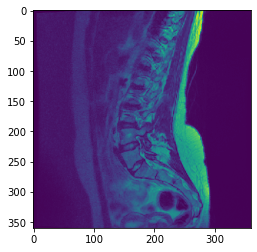

In [188]:
plt.imshow((image * 255).astype('uint8'))

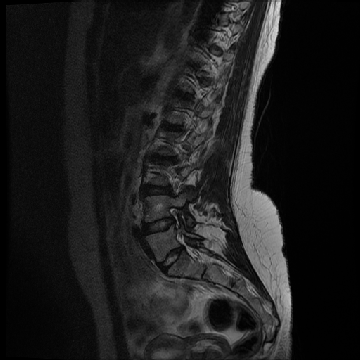

In [189]:
Image.fromarray((image * 255).astype(np.uint8))

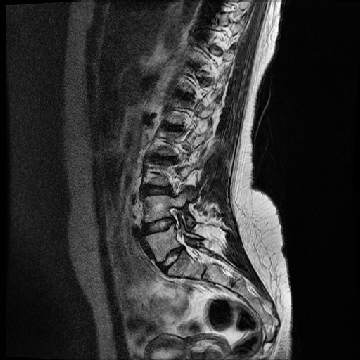

In [190]:
contrast_improve = [adjust_contrast(image, i) for i in range(5)]


Image.fromarray((contrast_improve[3] * 255).astype(np.uint8))

In [191]:
contrast_improve[3]

array([[0.00478, 0.00478, 0.00478, ..., 0.00478, 0.00478, 0.00478],
       [0.00478, 0.00478, 0.00478, ..., 0.00478, 0.00478, 0.00478],
       [0.00478, 0.00478, 0.00478, ..., 0.0136 , 0.0136 , 0.0136 ],
       ...,
       [0.00478, 0.00478, 0.00478, ..., 0.0136 , 0.00478, 0.00478],
       [0.00478, 0.00478, 0.00478, ..., 0.0136 , 0.00478, 0.0136 ],
       [0.00478, 0.00478, 0.00478, ..., 0.00478, 0.00478, 0.00478]],
      dtype=float16)

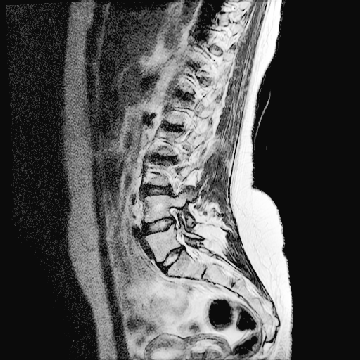

In [192]:
Image.fromarray((contrast_improve[1] * 255).astype(np.uint8))

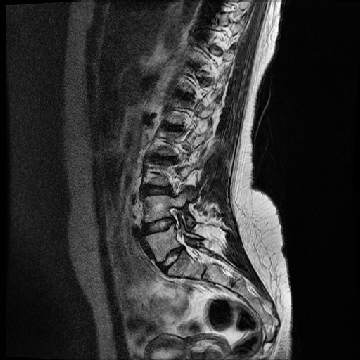

In [193]:
Image.fromarray((contrast_improve[3] * 255).astype(np.uint8))

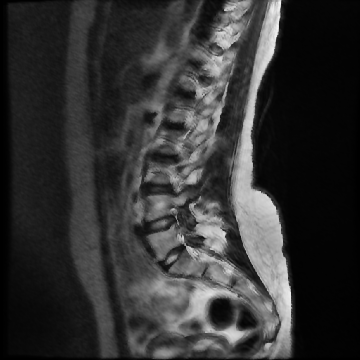

In [194]:
Image.fromarray((contrast_improve[4] * 255).astype(np.uint8))